<h1><center>Air France Internet Marketing: Optimizing Google, Yahoo!, MSN, and Kayak Sponsored Search</center></h1>

By Tanner Hefflefinger and Morgan Kaiser

Date: 05 May 2020

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('DoubleClick.xls')
df.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,NaN,Unassigned,...,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,NaN,Unassigned,...,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1


In [2]:
df.size

103730

In [3]:
df.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 23 columns):
Publisher ID                4510 non-null object
Publisher Name              4510 non-null object
Keyword ID                  4510 non-null int64
Keyword                     4510 non-null object
Match Type                  4462 non-null object
Campaign                    4510 non-null object
Keyword Group               4510 non-null object
Category                    4510 non-null object
Bid Strategy                3286 non-null object
Keyword Type                4510 non-null object
Status                      4510 non-null object
Search Engine Bid           4510 non-null float64
Clicks                      4510 non-null int64
Click Charges               4510 non-null float64
Avg. Cost per Click         4510 non-null float64
Impressions                 4510 non-null int64
Engine Click Thru %         4510 non-null float64
Avg. Pos.                   4510 non-null float64
Trans. Co

# Part 1

Add four additional metrics:

1. **Net Revenue**
2. **Return on Ad $ Spent (ROA)**
3. **Average Revenue per Booking**
4. **Probability of Booking**


**Then...** 

1. Provide descriptive statistics (Count, Max, Min, Mean, and Std.) for:
**CTR, TCR, Net Revenue, Avg. Cost per Click, ROA, Average Revenue per Booking, and Probability
of Booking**
2. Report a summary statistics table and provide short descriptions of
your observations and thoughts.

**Then...**
1. Make a Histogram for any of the variables of your own interests in the data.
2. Report any insights you may be able draw from the charts 

### Metric 1: Net Revenue

Amount (total revenue) – Total Cost)

In [5]:
df['Net Revenue'] = df['Amount'] - df['Total Cost']

In [6]:
df['Net Revenue'].head()

0    8775.6375
1    1573.5750
2     389.7625
3    1662.8375
4     932.8000
Name: Net Revenue, dtype: float64

### Metric 2: Return on Advertising

Net Revenue / Total Cost

Note: Set this variable as percentage. if Total Cost is 0, then set ROA as 0 for that observation

In [7]:
# if total cost > 0
df.loc[df['Total Cost'] > 0, 'Return on Ad $ Spent (ROA)'] = (df['Net Revenue']/df['Total Cost'])*100

# if total cost is equal to 0 or less than 0
df.loc[df['Total Cost'] <= 0, 'Return on Ad $ Spent (ROA)'] = 0

### Metric 3: Average Revenue per Booking

Amount /Total Volume of Bookings

Note: if Total Volume of Bookings is 0, then set null value for that observation


Total Volume of Bookings has both numeric and non-numeric values. convert to numeric BEFORE performing division to find avg revenue per booking metric. coerce sets non-numeric vals to NaN aka null

code source for immediate line below: https://datatofish.com/convert-string-to-float-dataframe/ 

In [8]:
# if total volume of bookings is 0 
#df.loc[df['Total Volume of Bookings'] == 0, 'Avg Revenue per Booking'] = 'NaN'
#df.loc[df['Total Volume of Bookings'] > 0, 'Avg Revenue per Booking'] = df['Amount'] / df['Total Volume of Bookings']

In [9]:
df['Total Volume of Bookings'] = pd.to_numeric(df['Total Volume of Bookings'], errors='coerce')

In [10]:
df['Avg Revenue per Booking'] = df['Amount'] / df['Total Volume of Bookings']

### Metric 4: Probability of Booking
Engine Click Thru % (CTR) * Trans. Conv. % (TCR) / 10000

In [11]:
df['Probability of Booking'] = (df['Engine Click Thru %'] * df['Trans. Conv. %']) / 10000

In [12]:
df.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue',
       'Return on Ad $ Spent (ROA)', 'Avg Revenue per Booking',
       'Probability of Booking'],
      dtype='object')

In [13]:
# create a copy of above df for later use in Bonus Section

bonus_df = df.copy()
bonus_df.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue',
       'Return on Ad $ Spent (ROA)', 'Avg Revenue per Booking',
       'Probability of Booking'],
      dtype='object')

## Summary Statistics of Variables

In [14]:
SS_df = df[['Engine Click Thru %', 'Trans. Conv. %', 'Net Revenue', 'Avg. Cost per Click', 'Return on Ad $ Spent (ROA)', 'Avg Revenue per Booking', 'Probability of Booking' ]]

In [15]:
SS_df.describe()

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Avg. Cost per Click,Return on Ad $ Spent (ROA),Avg Revenue per Booking,Probability of Booking
count,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,368.000000,4510.000000
mean,11.141451,0.569255,866.207678,1.890240,341.413864,1024.259502,0.000681
std,20.234582,13.862485,14246.298903,1.322375,7277.915278,704.318741,0.015151
min,0.000000,0.000000,-8725.924987,0.000000,-100.000000,34.000000,0.000000
25%,1.531681,0.000000,-18.871875,0.825000,-100.000000,562.912500,0.000000
50%,4.105614,0.000000,-4.987500,1.650493,-100.000000,899.725000,0.000000
75%,10.916928,0.000000,-1.600000,2.662500,-100.000000,1277.975000,0.000000
max,200.000000,900.000000,549524.050273,10.000000,379487.027027,5877.750000,0.818182


In [16]:
df_corr = SS_df.corr(method='pearson')
df_corr

,Engine Click Thru %,Trans. Conv. %,Net Revenue,Avg. Cost per Click,Return on Ad $ Spent (ROA),Avg Revenue per Booking,Probability of Booking
Engine Click Thru %,1.000000,0.001666,0.011397,0.106898,0.000861,-0.096359,0.028059
Trans. Conv. %,0.001666,1.000000,0.015157,0.003308,0.856458,-0.026921,0.889333
Net Revenue,0.011397,0.015157,1.000000,-0.052634,0.039354,0.086183,0.016561
Avg. Cost per Click,0.106898,0.003308,-0.052634,1.000000,-0.033836,-0.117778,0.004340
Return on Ad $ Spent (ROA),0.000861,0.856458,0.039354,-0.033836,1.000000,0.053132,0.772060
Avg Revenue per Booking,-0.096359,-0.026921,0.086183,-0.117778,0.053132,1.000000,-0.047665
Probability of Booking,0.028059,0.889333,0.016561,0.004340,0.772060,-0.047665,1.000000


### Engine Click Thru % (CTR)
*the ratio of users who click on a specific link to the number of total users who view a page, email, or advertisement. - Google ads help*

- On average, 11% of users who saw the ad clicked on the ad.

### TCR
- has a strong positive relationship with ROA

### Net Revenue
- Has an extremely wide set of values, ranging in dollars from -8726 to 549,524.
- The average is around $866.

### Avg. Cost per Click
- The average cost per click = 1.89 dollars
- Average spending of 0.83 dollars or more per click accounts for 75% of the data

### Return on Ad Dollar Spent (ROA)
- For one publisher, the return on spending money for an advertisement amounted to $379,487!

### Average Revenue per Booking
- 25% of Average Revenue per Booking is $1,278 and up

### Probability of Booking
- Does not exceed 81.2%
- strong, positive relationship with TCR and ROA

### Histogram Creation

C:\Users\tanner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:391: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\tanner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:392: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\tanner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tanner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


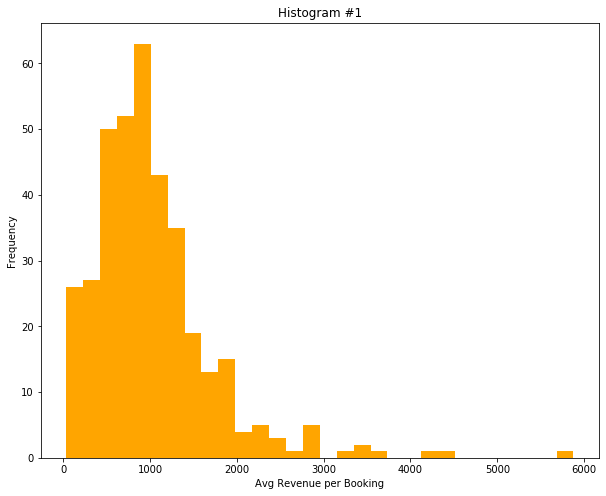

In [17]:
# hist 1
# setting bins to auto gives you the 'ideal' number of bins. we want a true rep of our data

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,8))
plt.hist(x=df['Avg Revenue per Booking'], bins = 'auto', color='orange')
plt.xlabel('Avg Revenue per Booking')
plt.ylabel('Frequency')
plt.title('Histogram #1')
plt.show()

#### Histogram #1 Observation

- A high frequency of bookings does not necessarily indicate a higher average revenue per booking.
- There were over 60 instances where there was an average revenue per booking of ~$1,000

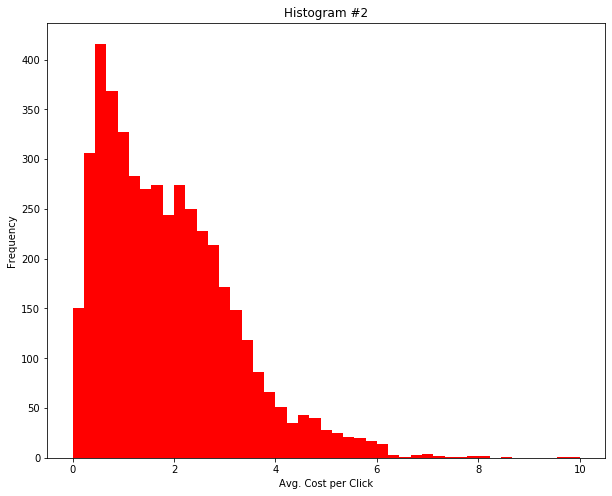

In [18]:
# hist 2

plt.figure(figsize=(10,8))
plt.hist(x=df['Avg. Cost per Click'], bins='auto', color='red')
plt.xlabel('Avg. Cost per Click')
plt.ylabel('Frequency')
plt.title('Histogram #2')
plt.show()

#### Histogram #2 Observation
- Setting bins to auto might not be the best parameter here, but could lead to a more faithful representation of our data as x is small in scale.
- Our data is positively skewed here (right skew). This means that mode > median > mean
- A substantial amount of instances had an average cost of $2 per click and below

# Part 2
Conduct regression analysis to study which factors influence the Total Cost.

Total Cost is your dependent variable (Y) and your task is to determine what the
important independent (explanatory) variables are. 

Use the domain knowledge you have learned from the case, personal experiences, and external research to guide your
variable selections. You may try different set of independent variables in the data set to see
which one(s) has significant results and support your belief. You may need to create
dummy variables for some of the non-numerical variables. 

## Reportables

1) the final set of independent variables you have chosen and why you have chosen them<br>
2) the estimated regression equation with simple explanations for each estimated coefficient (β) and its associated relationship<br>
- include significance, direction of the impact, magnitude of the impact, and justification of the identified relationship<br> 


Feel free to explore the data in any way you want, e.g. correlation matrix, scatter plots, etc

### Filling in missing values for "Match Type" and "Bid Strategy", while dropping "Avg Revenue per Booking" due to lack of values

In [19]:
values = {'Match Type': 'none', 'Bid Strategy': 'none'}
df = df.fillna(value=values)

In [20]:
df = df.drop(columns = ['Avg Revenue per Booking'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 26 columns):
Publisher ID                  4510 non-null object
Publisher Name                4510 non-null object
Keyword ID                    4510 non-null int64
Keyword                       4510 non-null object
Match Type                    4510 non-null object
Campaign                      4510 non-null object
Keyword Group                 4510 non-null object
Category                      4510 non-null object
Bid Strategy                  4510 non-null object
Keyword Type                  4510 non-null object
Status                        4510 non-null object
Search Engine Bid             4510 non-null float64
Clicks                        4510 non-null int64
Click Charges                 4510 non-null float64
Avg. Cost per Click           4510 non-null float64
Impressions                   4510 non-null int64
Engine Click Thru %           4510 non-null float64
Avg. Pos.                

> Note: **Publisher ID, Publisher Name, Keyword, Match Type, Campaign, Keyword Group, Category, Bid Strategy, Keyword Type, and Status** are all strings/object data types.



In [22]:
import statsmodels.api as sm

df_corr = df.corr(method='pearson')
df_corr

,Keyword ID,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,Return on Ad $ Spent (ROA),Probability of Booking
Keyword ID,1.000000,0.093671,-0.025194,-0.031804,0.172528,-0.035015,0.180809,-0.080956,0.039276,-0.048383,0.005132,-0.031804,0.004136,0.008379,0.036019,0.032809
Search Engine Bid,0.093671,1.000000,0.114934,0.113212,0.280368,0.023738,0.147721,-0.267877,0.002874,0.039652,0.107165,0.113212,0.114730,0.101718,-0.005297,0.008993
Clicks,-0.025194,0.114934,1.000000,0.868330,-0.033787,0.400361,-0.014000,-0.021096,0.001533,0.192615,0.830764,0.868330,0.827187,0.789419,0.015593,0.002635
Click Charges,-0.031804,0.113212,0.868330,1.000000,0.029171,0.431231,-0.027310,-0.018533,-0.000401,0.333614,0.549963,1.000000,0.539573,0.482530,0.003013,-0.000769
Avg. Cost per Click,0.172528,0.280368,-0.033787,0.029171,1.000000,-0.016912,0.106898,-0.113344,0.003308,0.058178,-0.047568,0.029171,-0.048201,-0.052634,-0.033836,0.004340
Impressions,-0.035015,0.023738,0.400361,0.431231,-0.016912,1.000000,-0.026821,-0.005288,-0.001338,0.201258,0.104770,0.431231,0.092177,0.069241,-0.000827,-0.002120
Engine Click Thru %,0.180809,0.147721,-0.014000,-0.027310,0.106898,-0.026821,1.000000,-0.221802,0.001666,-0.040646,0.008413,-0.027310,0.009194,0.011397,0.000861,0.028059
Avg. Pos.,-0.080956,-0.267877,-0.021096,-0.018533,-0.113344,-0.005288,-0.221802,1.000000,-0.013475,-0.012189,-0.030424,-0.018533,-0.031914,-0.030160,-0.024858,-0.024613
Trans. Conv. %,0.039276,0.002874,0.001533,-0.000401,0.003308,-0.001338,0.001666,-0.013475,1.000000,-0.000528,0.014417,-0.000401,0.017679,0.015157,0.856458,0.889333
Total Cost/ Trans.,-0.048383,0.039652,0.192615,0.333614,0.058178,0.201258,-0.040646,-0.012189,-0.000528,1.000000,0.035870,0.333614,0.036950,0.006182,-0.002331,-0.002432


### The DV will be "Total Cost" renamed as "Total_Cost"<br>
### From the correlations it appears that the top 5 most correlated variables are:
- Clicks
- Impressions
- Amount
- Net Revenue
- Total Volume of Bookings

In [23]:
df = df.rename(columns={"Total Cost":"Total_Cost"})
df.head()

,Publisher ID,Publisher Name,Keyword ID,Keyword,Match Type,Campaign,Keyword Group,Category,Bid Strategy,Keyword Type,...,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total_Cost,Total Volume of Bookings,Net Revenue,Return on Ad $ Spent (ROA),Probability of Booking
0,K2615,Yahoo - US,43000000039657988,fly to florence,Advanced,Western Europe Destinations,Florence,uncategorized,none,Unassigned,...,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,379487.027027,0.818182
1,K2615,Yahoo - US,43000000039651113,low international airfare,Advanced,Geo Targeted DC,Low International DC,uncategorized,none,Unassigned,...,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,251772.000000,0.166667
2,K2003,MSN - Global,43000000019452431,air discount france ticket,Broad,Air France Brand & French Destinations,France,uncategorized,Position 2-5 Bid Strategy,Unassigned,...,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,100583.870968,0.111111
3,K1175,Google - Global,43000000005663331,[airfrance],Exact,Air France Global Campaign,Air France,airfrance,Position 1- 3,Unassigned,...,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,71906.491546,0.004988
4,K1123,Overture - Global,43000000005421354,air france online booking,Standard,Unassigned,Unassigned,airfrance,Position 1-2 Target,Unassigned,...,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,42400.000000,0.003145


### Now to fit our chosen independent variables to the OLS model

In [24]:
X=sm.add_constant(df[['Clicks','Impressions','Amount', 'Net Revenue', 'Total Volume of Bookings']])
y=df.Total_Cost

C:\Users\tanner\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
updated_model=sm.OLS(y, X)
rresults=updated_model.fit()
print(rresults.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.504e+28
Date:                Tue, 05 May 2020   Prob (F-statistic):               0.00
Time:                        17:22:16   Log-Likelihood:                 94557.
No. Observations:                4510   AIC:                        -1.891e+05
Df Residuals:                    4504   BIC:                        -1.891e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

> Multicollinearity is the statistical phenomenon where IVs are highly correlated with each other in a multiple regression model. the following code with variance inflation factor (VIF) is from Morgan's exploration with another dataset. to avoid self-plagiarism, the inspiration source code is here: https://github.com/mokaiser/breast-cancer-diagnosis-a1/blob/master/multicollinearity.ipynb.

In [26]:
df.dropna(inplace=True) # vif can't be calculated with nan values
df = df._get_numeric_data() # drop non-numeric cols aka categorical vars
df.head()

,Keyword ID,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total_Cost,Total Volume of Bookings,Net Revenue,Return on Ad $ Spent (ROA),Probability of Booking
0,43000000039657988,6.25,1,2.3125,2.312500,11,9.090909,1.272727,900.000000,0.256944,8777.95,2.3125,9,8775.6375,379487.027027,0.818182
1,43000000039651113,6.25,1,0.6250,0.625000,6,16.666667,1.000000,100.000000,0.625000,1574.20,0.6250,1,1573.5750,251772.000000,0.166667
2,43000000019452431,0.00,1,0.3875,0.387500,9,11.111111,1.111111,100.000000,0.387500,390.15,0.3875,1,389.7625,100583.870968,0.111111
3,43000000005663331,7.50,59,2.3125,0.039195,401,14.713217,2.000000,3.389831,1.156250,1665.15,2.3125,2,1662.8375,71906.491546,0.004988
4,43000000005421354,0.25,8,2.2000,0.275000,318,2.515723,2.975786,12.500000,2.200000,935.00,2.2000,1,932.8000,42400.000000,0.003145


In [27]:
df.columns

Index(['Keyword ID', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total_Cost', 'Total Volume of Bookings', 'Net Revenue',
       'Return on Ad $ Spent (ROA)', 'Probability of Booking'],
      dtype='object')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Indicate which variables to compute VIF
# do not include Total_Cost as this is our DV
X = df[['Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Volume of Bookings', 'Net Revenue',
       'Return on Ad $ Spent (ROA)', 'Probability of Booking']]

# add intercept
X['intercept'] = 1

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif

C:\Users\tanner\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\tanner\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Search Engine Bid,1.192765
1,Clicks,19.578585
2,Click Charges,inf
3,Avg. Cost per Click,1.119259
4,Impressions,1.584228
5,Engine Click Thru %,1.072347
6,Avg. Pos.,1.121337
7,Trans. Conv. %,7.301174
8,Total Cost/ Trans.,1.194922
9,Amount,inf


From statsmodels:

>"**If VIF > 5**, then the explanatory variable is **highly collinear with the other explanatory variables**, and the parameter estimates will have **large standard errors** because of this."

It seems that **Clicks, Click Charges, Trans. Conv. %, Amount, Total Volume of Bookings, and Net Revenue are above the threshold (VIF > 5)**. This means we should **drop these columns** as they will cause a negative effect on our OLS regression model.

From Investopedia:

>"It is **better to use independent variables that are not correlated** when building multiple regression models that use two or more variables."

This is directly related to our project.

In [29]:
after_vif_df = df.drop(columns=['Clicks','Click Charges','Trans. Conv. %','Amount','Total Volume of Bookings','Net Revenue'])
after_vif_df.head()

,Keyword ID,Search Engine Bid,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Total Cost/ Trans.,Total_Cost,Return on Ad $ Spent (ROA),Probability of Booking
0,43000000039657988,6.25,2.312500,11,9.090909,1.272727,0.256944,2.3125,379487.027027,0.818182
1,43000000039651113,6.25,0.625000,6,16.666667,1.000000,0.625000,0.6250,251772.000000,0.166667
2,43000000019452431,0.00,0.387500,9,11.111111,1.111111,0.387500,0.3875,100583.870968,0.111111
3,43000000005663331,7.50,0.039195,401,14.713217,2.000000,1.156250,2.3125,71906.491546,0.004988
4,43000000005421354,0.25,0.275000,318,2.515723,2.975786,2.200000,2.2000,42400.000000,0.003145


Now, let's try building the OLS model again.

In [30]:
X=sm.add_constant(after_vif_df[['Search Engine Bid','Avg. Cost per Click', 'Impressions',
                      'Engine Click Thru %','Avg. Pos.', 'Total Cost/ Trans.',
                      'Return on Ad $ Spent (ROA)', 'Probability of Booking']])
y=after_vif_df.Total_Cost

In [31]:
updated_model=sm.OLS(y, X)
rresults=updated_model.fit()
print(rresults.summary())

                            OLS Regression Results                            
Dep. Variable:             Total_Cost   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     196.5
Date:                Tue, 05 May 2020   Prob (F-statistic):          5.08e-286
Time:                        17:22:21   Log-Likelihood:                -38205.
No. Observations:                4510   AIC:                         7.643e+04
Df Residuals:                    4501   BIC:                         7.649e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

### Regression Results

*Although the coefficients are still extremely large, we have significantly reduced the magnitude error associated with multicollinearity. Please also note we are only including variables with P>|t| = 0.05 or less.*

**Equation**

Total_Cost = -123.90 + 40.92SearchEngineBid + 0.0030Impressions + 1.50TotalCostPerTrans
___
### Variable Breakdown


**Search Engine Bid**
- For every 1 unit increase of Total_Cost, Search Engine Bid would increase by ~40 units
- P < 0.05, statistically significant

**Avg. Cost per Click**
- For every 1 unit increase of Total_Cost, Avg Cost per Click would decrease by ~4 units
- P > 0.05, NOT statistically significant


**Impressions**
- For every 1 unit increase of Total_Cost, Impressions would increase by ~0.0030 units
- P < 0.05, statistically significant

**Engine Click Thru %**
- For every 1 unit increase of Total_Cost, Engine Click Thru % would decrease by ~1 unit
- P > 0.05, NOT statistically significant

**Avg. Pos.**
- For every 1 unit increase of Total_Cost, Avg. Pos would increase by ~11 units
- P > 0.05, NOT statistically significant

**Total Cost/Trans**
- For every 1 unit increase of Total_Cost, Total Cost/Trans would increase by ~1 unit
- P < 0.05, statistically significant

**ROA**
- For every 1 unit increase of Total_Cost, ROA would increase by ~0.001 unit
- P > 0.05, NOT statistically significant

**Probability of Booking**
- For every 1 unit increase of Total_Cost, Probability of Booking would decrease by ~657 units
- P > 0.05, NOT statistically significant

---
# Bonus Questions

### Bonus 1

Summarize metrics for each publisher. Please report the summary table. In addition, discuss key Observations and takeaways.

**Publisher Names:**
- Google-Global
- Google-US
- MSN-Global
- MSN-US
- Overture-Global
- Overture-US
- Yahoo-US
- Grand Total

**Metrics:**
1. Sum of Net Revenue
- Average Cost Per Click
- Total Volume of Bookings
- Average Revenue Per Booking
- ROA
- Probability of Booking
- Sum of Click Charges
- Cost/Booking

In [32]:
# checking we are using the df we want
bonus_df.columns

Index(['Publisher ID', 'Publisher Name', 'Keyword ID', 'Keyword', 'Match Type',
       'Campaign', 'Keyword Group', 'Category', 'Bid Strategy', 'Keyword Type',
       'Status', 'Search Engine Bid', 'Clicks', 'Click Charges',
       'Avg. Cost per Click', 'Impressions', 'Engine Click Thru %',
       'Avg. Pos.', 'Trans. Conv. %', 'Total Cost/ Trans.', 'Amount',
       'Total Cost', 'Total Volume of Bookings', 'Net Revenue',
       'Return on Ad $ Spent (ROA)', 'Avg Revenue per Booking',
       'Probability of Booking'],
      dtype='object')

In [33]:
grouped = bonus_df.groupby('Publisher Name')

### Metric 1: Sum of Net Revenue

In [34]:
sum_net_rev = grouped['Net Revenue'].sum()
#sum_net_rev.rename(columns={sum_net_rev[1]:'Net Revenue'}, inplace=True)
print(sum_net_rev)

Publisher Name
Google - Global      8.086031e+05
Google - US          1.391841e+06
MSN - Global         1.333639e+05
MSN - US             1.654513e+05
Overture - Global    3.657888e+05
Overture - US        2.054572e+05
Yahoo - US           8.360911e+05
Name: Net Revenue, dtype: float64


### Metric 2: Average Cost / Click

In [35]:
avg_cost = grouped['Avg. Cost per Click'].mean()
avg_cost 

Publisher Name
Google - Global      2.224959
Google - US          2.383942
MSN - Global         2.152998
MSN - US             2.867470
Overture - Global    0.804759
Overture - US        0.763921
Yahoo - US           1.998876
Name: Avg. Cost per Click, dtype: float64

### Metric 3: Total Volume of Bookings

In [36]:
tot_vol = grouped['Total Volume of Bookings'].sum()
tot_vol

Publisher Name
Google - Global       797
Google - US          1550
MSN - Global          129
MSN - US              140
Overture - Global     372
Overture - US         289
Yahoo - US            662
Name: Total Volume of Bookings, dtype: int64

### Metric 4: Average Revenue per Booking

In [37]:
avg_rev = grouped['Avg Revenue per Booking'].mean()
avg_rev

Publisher Name
Google - Global       979.806854
Google - US           909.273941
MSN - Global         1238.890416
MSN - US              940.913379
Overture - Global    1126.287186
Overture - US        1131.801353
Yahoo - US           1273.195930
Name: Avg Revenue per Booking, dtype: float64

### Metric 5: ROA

In [38]:
roa = grouped['Return on Ad $ Spent (ROA)'].sum()
roa

Publisher Name
Google - Global      184333.771453
Google - US          253043.395083
MSN - Global         105426.939183
MSN - US              11572.559630
Overture - Global    248001.653633
Overture - US         80387.926970
Yahoo - US           657010.278741
Name: Return on Ad $ Spent (ROA), dtype: float64

### Metric 6: Probability of Booking

In [39]:
prob_book = grouped['Probability of Booking'].mean()
prob_book

Publisher Name
Google - Global      0.000456
Google - US          0.000757
MSN - Global         0.001255
MSN - US             0.000546
Overture - Global    0.000086
Overture - US        0.000065
Yahoo - US           0.001661
Name: Probability of Booking, dtype: float64

### Metric 7: Sum of Click Charges

In [40]:
sum_click = grouped['Click Charges'].sum()
sum_click

Publisher Name
Google - Global      120946.711971
Google - US          353640.598920
MSN - Global          12160.362438
MSN - US              16098.487407
Overture - Global     64295.862144
Overture - US        141976.074456
Yahoo - US            46197.824620
Name: Click Charges, dtype: float64

### Metric 8: Cost / Booking

sum of click charges/total volume of booking

In [41]:
cost_book = sum_click / tot_vol
cost_book

Publisher Name
Google - Global      151.752462
Google - US          228.155225
MSN - Global          94.266375
MSN - US             114.989196
Overture - Global    172.838339
Overture - US        491.266694
Yahoo - US            69.785234
dtype: float64

In [42]:
result = pd.concat([sum_net_rev, avg_cost, tot_vol, avg_rev, roa, prob_book, sum_click, cost_book], axis=1)
result

,Net Revenue,Avg. Cost per Click,Total Volume of Bookings,Avg Revenue per Booking,Return on Ad $ Spent (ROA),Probability of Booking,Click Charges,0
Publisher Name,,,,,,,,
Google - Global,8.086031e+05,2.224959,797,979.806854,184333.771453,0.000456,120946.711971,151.752462
Google - US,1.391841e+06,2.383942,1550,909.273941,253043.395083,0.000757,353640.598920,228.155225
MSN - Global,1.333639e+05,2.152998,129,1238.890416,105426.939183,0.001255,12160.362438,94.266375
MSN - US,1.654513e+05,2.867470,140,940.913379,11572.559630,0.000546,16098.487407,114.989196
Overture - Global,3.657888e+05,0.804759,372,1126.287186,248001.653633,0.000086,64295.862144,172.838339
Overture - US,2.054572e+05,0.763921,289,1131.801353,80387.926970,0.000065,141976.074456,491.266694
Yahoo - US,8.360911e+05,1.998876,662,1273.195930,657010.278741,0.001661,46197.824620,69.785234


> Overture has the lowest probability of booking for users based in the United States.

> Google has the highest click charges domestically and internationally.

> Overture had the highest overall click charges per booking in the US, over Google and MSN

In [43]:
#result.rename(columns={'0': 'Cost/Booking'})

### Bonus 2

Based on the one-week summary data provided for Kayak in “kayak” sheet of the
excel file, please calculate the following metrics and clearly show your calculation process.

1. Kayak Trans. Conv. Rate
- Average Publisher TCR
- Kayak CPC
- Average Publisher CPC


Comparing the calculations with what you have derived from Bonus question #1, what
recommendation you would like to make about marketing in Kayak relative to other
publishers?

In [72]:
import pandas as pd 
kayak_df = pd.read_excel('Kayak.xls')
kayak_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Sponsored Links - Air France,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
kayak_df = kayak_df.rename(columns={"Unnamed: 1":"Search Engine","Unnamed: 2":"Clicks","Unnamed: 3":"Media Cost","Unnamed: 4":"Total Bookings","Unnamed: 5":"Avg Ticket","Unnamed: 6":"Total Revenue","Unnamed: 7":"Net Revenue"})
kayak_df.head(10)

,Unnamed: 0,Search Engine,Clicks,Media Cost,Total Bookings,Avg Ticket,Total Revenue,Net Revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Sponsored Links - Air France,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Search Engine,Clicks,Media Cost,Total Bookings,Avg Ticket,Total Revenue,Net Revenue
7,NaN,Kayak,2839,3567.13,208,1123.53,233694,230127
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Time Period is One Week (6/04/07 - 6/10/07),NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
kayak_df = kayak_df.drop([0,1,2,3,4,5,6,8,9])
kayak_df = kayak_df.drop(['Unnamed: 0'], axis=1)
kayak_df

,Search Engine,Clicks,Media Cost,Total Bookings,Avg Ticket,Total Revenue,Net Revenue
7,Kayak,2839,3567.13,208,1123.53,233694,230127


### Metric 1: Trans. Conv. Rate

In [75]:
kayak_df

,Search Engine,Clicks,Media Cost,Total Bookings,Avg Ticket,Total Revenue,Net Revenue
7,Kayak,2839,3567.13,208,1123.53,233694,230127


In [76]:
kayak_TCR = kayak_df[['Total Bookings']].div(kayak_df.Clicks, axis=0)

In [77]:
kayak_TCR

,Total Bookings
7,0.0732652


> The Transaction Conversion Rate is 7.33%

### Metric 2: Average Publisher TCR

total bookings/clicks

In [78]:
sums = bonus_df.groupby(["Publisher Name"]).sum().sort_values("Net Revenue", ascending=True)
sums

,Keyword ID,Search Engine Bid,Clicks,Click Charges,Avg. Cost per Click,Impressions,Engine Click Thru %,Avg. Pos.,Trans. Conv. %,Total Cost/ Trans.,Amount,Total Cost,Total Volume of Bookings,Net Revenue,Return on Ad $ Spent (ROA),Avg Revenue per Booking,Probability of Booking
Publisher Name,,,,,,,,,,,,,,,,,
MSN - Global,4.257000e+18,0.0000,11217.0,12160.362438,213.146822,139979.0,726.224884,176.683655,112.201563,1105.415869,145524.25,12160.362438,129.0,1.333639e+05,105426.939183,12388.904156,0.124224
MSN - US,4.214000e+18,0.0000,10808.0,16098.487407,281.012068,170120.0,809.825062,172.362044,71.683550,505.456018,181549.80,16098.487407,140.0,1.654513e+05,11572.559630,8468.220414,0.053506
Overture - US,2.842300e+19,1350.6625,119323.0,141976.074456,504.951489,17062488.0,1766.751438,1651.034823,62.725412,28859.714386,347433.25,141976.074456,289.0,2.054572e+05,80387.926970,54326.464946,0.042853
Overture - Global,2.377900e+19,2641.8000,60899.0,64295.862144,445.031643,17898727.0,1961.968457,1066.630917,130.347708,9107.190341,430084.70,64295.862144,372.0,3.657888e+05,248001.653633,50682.923353,0.047681
Google - Global,1.689900e+19,2552.5000,72895.0,120946.711971,874.409053,1808326.0,3534.832560,600.434129,170.037009,27862.313379,929549.80,120946.711971,797.0,8.086031e+05,184333.771453,87202.810029,0.179334
Yahoo - US,2.730500e+19,3989.9125,45598.0,46197.824620,1269.286042,933345.0,10197.476850,1136.237388,1161.296968,5052.422226,882288.95,46197.824620,662.0,8.360911e+05,657010.278741,42015.465690,1.054891
Google - US,8.905300e+19,13975.3125,192109.0,353640.598920,4937.143388,3855689.0,31250.862871,3899.292193,859.048175,52017.065255,1745481.80,353640.598920,1550.0,1.391841e+06,253043.395083,121842.708061,1.568593


In [79]:
pub_trans_conv = sums[['Total Volume of Bookings']].div(sums.Clicks, axis=0)
pub_trans_conv

,Total Volume of Bookings
Publisher Name,
MSN - Global,0.011500
MSN - US,0.012953
Overture - US,0.002422
Overture - Global,0.006108
Google - Global,0.010934
Yahoo - US,0.014518
Google - US,0.008068


#### Publishers TCR
- MSN Global - 1.15%
- MSN US - 1.30%
- Overture US - 0.24%
- Google Global - 1.1%
- Yahoo US - 1.45%
- Google US - 0.81%

### Metric 3: Kayak CPC

In [80]:
kayak_df

,Search Engine,Clicks,Media Cost,Total Bookings,Avg Ticket,Total Revenue,Net Revenue
7,Kayak,2839,3567.13,208,1123.53,233694,230127


In [85]:
kayak_df = kayak_df.rename(columns={"Media Cost": "Media_Cost"})

In [87]:
CPC = kayak_df[['Clicks']].div(kayak_df.Media_Cost, axis=0)

- Kayak paid approximately \$.80 per click

### Metric 4: Average Publisher CPC

In [89]:
#sums.head()

In [90]:
sums = sums.rename(columns={"Total Cost":"Total_Cost"})

In [104]:
pub_cpc = sums[['Clicks']].div(sums.Total_Cost, axis=0)

In [105]:
pub_cpc

,Clicks
Publisher Name,
MSN - Global,0.922423
MSN - US,0.671367
Overture - US,0.840444
Overture - Global,0.947168
Google - Global,0.602703
Yahoo - US,0.987016
Google - US,0.543232


---
# Recommendations for Marketing in Kayak

- Kayak is doing much better than other publishers with click conversion percentage, have a 7.8% conversion rate compared to the closest publisher, Yahoo, at 1.45%<br>
- For Cost Per Click Kayak is in the middle of the pack at $0.80 per click, the publishers beating them include MSN US, Google Global and Google US. 
- MSN and Google likely have a lower CPC due to shear amount of clicks over Kayak. They each have substantial platforms that dwarf Kayak so a better strategy for Kayak to lower their own CPC would likely be to either expand the platform as a whole or reach out to site with greater traffic for advertising purposes.